## News Recommendation System

Today, digital content consumption is rapidly increasing and it is becoming increasingly difficult for users to find news that suits their interests. At this point, news recommendation systems come into play. These systems analyze users' past interactions, preferences, and interests and aim to offer them the most appropriate news.

News recommendation systems play a critical role in improving user experience and facilitating content discovery. Users can get lost among numerous news sources and content. Recommendation systems reduce this confusion and save time by offering users personalized content. In addition, they enable users to stay on the platform longer and interact more.

Thanks to developing machine learning and natural language processing techniques, the accuracy and effectiveness of news recommendation systems are increasing day by day. This plays an important role in the future of the media and news industry. In this project, we will develop a system that recommends news.

<img src='news.jpg' width=550 >

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('News.csv')
#Read the file.

## EDA - Exploratory Data Analysis

In [5]:
df.head()

,ID,News Category,Title,Summary
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
3,N86255,health,Dispose of unwanted prescription drugs during ...,NaN
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...


In [6]:
df.shape

(101527, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             101527 non-null  object
 1   News Category  101527 non-null  object
 2   Title          101527 non-null  object
 3   Summary        96112 non-null   object
dtypes: object(4)
memory usage: 3.1+ MB


In [8]:
df.isnull().sum()

,0
ID,0
News Category,0
Title,0
Summary,5415


In [9]:
df=df.dropna()

In [10]:
df['Title']=df['Title'].str.lower()
df['Title']=df['Title'].str.replace("[^\w\s]" , "",regex=True)
df['Title']=df['Title'].str.replace('[\n]', '',regex=True)
df['Title']=df['Title'].str.replace('\d+','',regex=True)
df['Title']=df['Title'].str.replace('\r',' ')

In [11]:
df['Summary']=df['Summary'].str.lower()
df['Summary']=df['Summary'].str.replace("[^\w\s]" , "",regex=True)
df['Summary']=df['Summary'].str.replace('[\n]', '',regex=True)
df['Summary']=df['Summary'].str.replace('\d+','',regex=True)
df['Summary']=df['Summary'].str.replace('\r',' ')

In [12]:
df['Title'][0]

'the brands queen elizabeth prince charles and prince philip swear by'

In [13]:
df['Summary'][13]

'every confirmed or expected ps game we cant wait to play'

In [14]:
df['News Category'].value_counts()

,count
News Category,
sports,29626
news,29365
finance,5778
travel,4605
video,4563
foodanddrink,4319
lifestyle,4256
weather,3820
health,2815


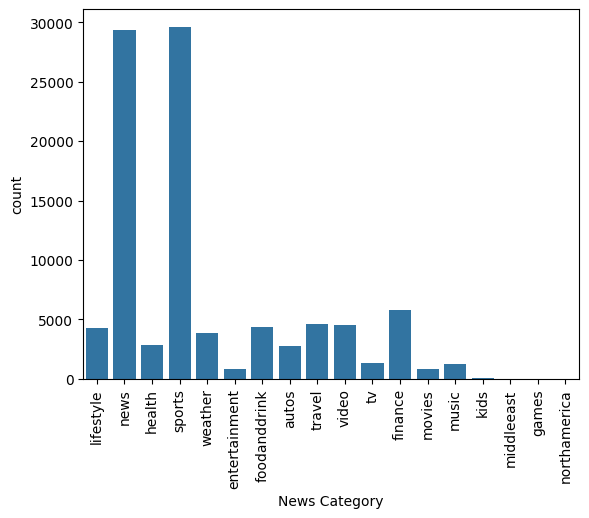

In [15]:
sns.countplot(x=df['News Category'])
plt.xticks(rotation=90);

### Separating Non-English Languages

In [41]:
#pip install langdetect

In [17]:
from langdetect import detect

In [18]:
df['lang']=df['Title'].apply(lambda x: detect(x))

In [19]:
df['lang'].value_counts()

,count
lang,
en,92141
af,579
fr,539
da,487
nl,458
ca,335
no,309
it,298
sv,200


In [20]:
df = df[df['lang'] == 'en']

In [21]:
df.shape

(92141, 5)

In [22]:
df.head()

,ID,News Category,Title,Summary,lang
0,N88753,lifestyle,the brands queen elizabeth prince charles and ...,shop the notebooks jackets and more that the r...,en
1,N45436,news,walmart slashes prices on lastgeneration ipads,apples new ipad releases bring big deals on la...,en
2,N23144,health,worst habits for belly fat,these seemingly harmless habits are holding yo...,en
4,N93187,news,the cost of trumps aid freeze in the trenches ...,lt ivan molchanets peeked over a parapet of sa...,en
5,N75236,health,i was an nba wife heres how it affected my men...,i felt like i was a fraud and being an nba wif...,en


### Count Vectorization

In [42]:
#!pip install textblob

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
from textblob import TextBlob
from sklearn.feature_extraction import text

#### Recommendation System Based On The Summary In The News

In [31]:
feature = df["Summary"].tolist()
tfidf = text.TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [32]:
indices = pd.Series(df.index, index=df['Summary']).drop_duplicates()

In [35]:
df['Summary'][0]

'shop the notebooks jackets and more that the royals cant live without'

In [36]:
def news_recommendation(Summary, similarity = similarity):
    index = indices[Summary]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores,
    key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    newsindices = [i[0] for i in similarity_scores]
    return df['Summary'].iloc[newsindices]

print(news_recommendation("shop the notebooks jackets and more that the royals cant live without"))


0        shop the notebooks jackets and more that the r...
13107                  will the royals ever hire a manager
61112                        more bad luck for the jackets
11087    were so very fortunate to live in a world fill...
55157                         hint it will star the royals
36719             the jackets win in a true game of inches
86445             will the royals be running under matheny
74952    royals enjoy a beer just as much as the next p...
75729    the jackets take on elon monday night in the h...
24909    it was another solid performance from one of t...
Name: Summary, dtype: object


#### Recommendation System Based On The Title In The News

In [37]:
feature = df["Title"].tolist()
tfidf = text.TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [38]:
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [39]:
df['Title']

,Title
0,the brands queen elizabeth prince charles and ...
1,walmart slashes prices on lastgeneration ipads
2,worst habits for belly fat
4,the cost of trumps aid freeze in the trenches ...
5,i was an nba wife heres how it affected my men...
...,...
101519,adapting learning and soul searching reflectin...
101521,devils strike fast hold off canucks
101522,st dominic soccer player tries to kick cancer ...
101523,mansion monday contemporary des moines home is...


In [40]:
def news_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores,
    key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    newsindices = [i[0] for i in similarity_scores]
    return df['Title'].iloc[newsindices]

print(news_recommendation("walmart slashes prices on lastgeneration ipads"))

1           walmart slashes prices on lastgeneration ipads
76024    walmart black friday  deals unveiled huge pric...
2132             ceo slashes own salary to pay employees k
95741    ford escape discount slashes up to  this november
37970    walmart and kroger undercut drugstore chains p...
90316    us consumer prices up  in october gasoline pri...
89588    consumer prices rise most in  months on higher...
74916                   the top deals at walmart right now
77220    uniontown walmart is first walmart in pennsylv...
39634    federal reserve slashes interest rates for thi...
Name: Title, dtype: object


## Summary

News recommendation systems are an important tool for improving user experience and increasing access to information. An effective system can increase interaction by providing content that suits users' needs quickly and accurately. In this project, we examined and organized our data. We converted the necessary columns to lower case and removed punctuation marks. We removed stopwords. We created a content-based recommendation system and completed our project.